In [1]:
# Update json files for zackRanks raw files
# Daily Looping
from backtesting import Backtest, Strategy
import yfinance as yf
import json
import pandas as pd
import datetime
import pandas_ta as ta
import tqdm
import subprocess
route = "../Database/"
filemap = {
    "NYSE"  : route + "../Database/zackRanks_NYSE.json", # 1352
    "NASDAQ": route + '../Database/zackRanks_NASDAQ.json', # small:1255; mid:330; large:72
    "SP500" : route + "../Database/zackRanks_SP500.json", # small: 1352
   "Yuanta": route + "zackRanks_yuanta.json",
   "buy": route + "buy.json",
   "sell": route + "sell.json",
   "portfolio": route + "zackRanks_portfolio.json"
}

def mains(today=0, loops = ["NYSE", "NASDAQ", "SP500"]):
    for k in loops:
        print("*"*20, k, "*"*20)
        with open(filemap[k], 'r') as f:
            python_dict = json.load(f)
            a = list(python_dict.keys())
            with tqdm.tqdm(total=len(a)) as pbar:
                for ticker in a:
                    try:
                        command = "zacks-api " + ticker
                        result = subprocess.check_output(command, shell=True)
                        result_decoded = result.decode("utf-8")
        # Parse the result as JSON
                        dict = json.loads(result_decoded)
                        tick = dict["ticker"]
                        rank = dict["zacksRank"]
                        if today == 0:
                            dat = dict["updatedAt"].split("T")[0]
                        else:
                            dat = datetime.datetime.now() - datetime.timedelta(days=today)
                        python_dict[tick][dat] = rank
                    except:
                        print(f"{ticker} passed")
                        pass
                    pbar.update(1)

        with open(filemap[k], 'w') as f:
            json.dump(python_dict, f, indent=4)

loops = ["SP500", "NYSE", "NASDAQ", "portfolio"]
# today: default_day = 0
mains(today=0, loops=loops)

c:\Users\p3749\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


******************** SP500 ********************


 84%|████████▍ | 418/499 [08:17<16:30, 12.23s/it]

PODD passed


100%|██████████| 499/499 [09:43<00:00,  1.17s/it]


******************** NYSE ********************


  3%|▎         | 54/1705 [01:17<3:22:56,  7.38s/it]

DT passed


 16%|█▌        | 272/1705 [05:07<24:25,  1.02s/it] 

NTCO passed


 36%|███▌      | 606/1705 [12:14<4:45:48, 15.60s/it]

DBRG passed


 51%|█████▏    | 875/1705 [17:45<2:34:02, 11.14s/it]

ASH passed


 62%|██████▏   | 1055/1705 [21:06<11:00,  1.02s/it] 

SEAS passed


100%|██████████| 1705/1705 [32:50<00:00,  1.16s/it]


******************** NASDAQ ********************


  0%|          | 1/2161 [00:00<34:40,  1.04it/s]

NSTG passed


  0%|          | 10/2161 [00:10<35:30,  1.01it/s]

IMGN passed


 15%|█▌        | 326/2161 [06:07<5:48:30, 11.40s/it]

EA passed


 17%|█▋        | 368/2161 [07:09<3:27:25,  6.94s/it]

CCEP passed


 41%|████      | 877/2161 [15:51<20:45,  1.03it/s]  

GRCL passed


 48%|████▊     | 1031/2161 [18:28<18:55,  1.00s/it]

THRX passed


 49%|████▉     | 1069/2161 [19:06<17:33,  1.04it/s]

ICVX passed


 73%|███████▎  | 1586/2161 [28:03<09:50,  1.03s/it]

SIEN passed


 99%|█████████▉| 2139/2161 [37:37<00:23,  1.06s/it]

FRLN passed


100%|██████████| 2161/2161 [38:00<00:00,  1.06s/it]


******************** portfolio ********************


100%|██████████| 17/17 [00:16<00:00,  1.00it/s]


In [ ]:
# update Tickers/{}.csv
import datetime
import pandas as pd
import yfinance as yf
route = "../Database/"
filemap = {
    "NYSE"  : route + "../Database/zackRanks_NYSE.json", # 1352
    "NASDAQ": route + '../Database/zackRanks_NASDAQ.json', # small:1255; mid:330; large:72
    "SP500" : route + "../Database/zackRanks_SP500.json", # small: 1352
   "Yuanta": route + "zackRanks_yuanta.json",
   "buy": route + "buy.json",
   "sell": route + "sell.json",
   "portfolio": route + "zackRanks_portfolio.json"
}
def daily_add_datetime_minus_1(loops=list(filemap.keys())):
    for kys in loops:
        with open(filemap[kys], "r") as f:
            python_dict = json.load(f)
            a = list(python_dict.keys())
        i = 0
        for ticker in a:
            df = pd.read_csv(f"../Database/Tickers/{ticker}.csv", index_col="Date")
            start = datetime.datetime.now()-datetime.timedelta(days=1)
            ftime = start.strftime("%Y-%m-%d")
            try:
                b = df.loc[ftime]
            except KeyError:
                a = yf.download("A", start=start)
                a.index = [ftime]
                df = pd.concat([df, a])
                df.index.name = "Date"
                df.to_csv("../Database/Tickers/A.csv", index="Date")
                if i == 0:
                    print(f"added on {kys}")
                    i += 1
daily_add_datetime_minus_1()                

In [ ]:
# initialization of Tickers/{}.csv
import datetime
import pandas as pd
import yfinance as yf
route = "../Database/"
filemap = {
    "NYSE"  : route + "../Database/zackRanks_NYSE.json", # 1352
    "NASDAQ": route + '../Database/zackRanks_NASDAQ.json', # small:1255; mid:330; large:72
    "SP500" : route + "../Database/zackRanks_SP500.json", # small: 1352
   "Yuanta": route + "zackRanks_yuanta.json",
   "buy": route + "buy.json",
   "sell": route + "sell.json",
   "portfolio": route + "zackRanks_portfolio.json"
}
def database_initialization():
    for kys in ["NYSE", "NASDAQ", "SP500"]:
        with open(filemap[kys], "r") as f:
            python_dict = json.load(f)
            a = list(python_dict.keys())
        a = list(python_dict.keys())
        for ticker in a:
            print(ticker)
            df = yf.download(ticker, progress=False)
            df.to_csv(f"../Database/Tickers/{ticker}.csv")
        
database_initialization()                


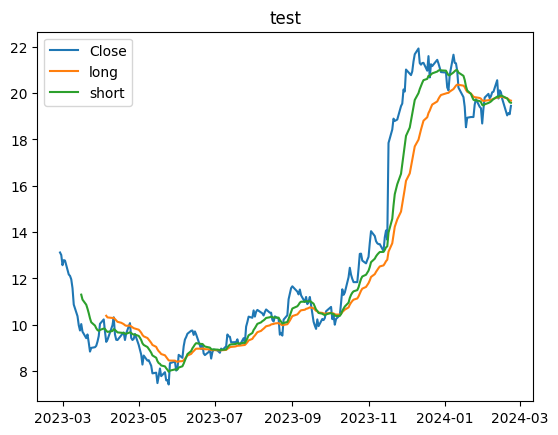

0

In [14]:
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
def WPRbt(data):
    period = 12
    max = data.Close.rolling(period).max()
    min = data.Close.rolling(period).min()
    wpr = (max - data.Close)/(max - min) * (-100) 
    return wpr

def check_WPR_2MA_without_DB(days, ticker, test=False, period_long_ma=28, period_short_ma=14, upb=-20, lob=-80):
    a = yf.download(ticker, start=datetime.datetime.now() - datetime.timedelta(days=days), interval="1d", progress=False)

    # a["WPR"] = WPRbt(a)
    a["MAX"] = a.High.rolling(12).max()
    a["MIN"] = a.Low.rolling(12).min()
    a["WPRs"] = (a.MAX - a.Close)/(a.MAX - a.MIN) * (-100)
    a["long_MA"] = a.Close.ewm(span=period_long_ma, adjust=False, min_periods=period_long_ma).mean()
    a['short_MA'] = a.Close.ewm(span=period_short_ma, adjust=False, min_periods=period_short_ma).mean()
    long0 = a['long_MA'][-1]
    long1 = a['long_MA'][-2]
    long2 = a['long_MA'][-3]
    long3 = a['long_MA'][-4]
    # =======================
    short0 = a['short_MA'][-1]
    short1 = a['short_MA'][-2]
    short2 = a['short_MA'][-3]
    short3 = a['short_MA'][-4]
    # =======================
    wpr0 = a['WPRs'][-1]
    wpr1 = a['WPRs'][-2]
    wpr2 = a['WPRs'][-3]
    wpr3 = a['WPRs'][-4]
    check_ma_percent = 0.0000# for PAYX at 2024-02-08, 0.005 return 4(meaning doesn't work ) while 0.006 works
    bear_market = (long0 - short0 > long0*check_ma_percent) and (long1 - short1 > long1*check_ma_percent) and (long2 - short2 > long2*check_ma_percent)
    bull_market = (long0 - short0 < long0*-check_ma_percent) and (long1 - short1 < long1*-check_ma_percent) and (long2 - short2 < long2*-check_ma_percent)
    if test:
        print(a[['Close', "short_MA", "long_MA", "WPRs", "MAX"]])
        print(wpr0, wpr1, wpr2, wpr3)
        print("quick: ", [short3, short2, short1, short0])
        print("slow: ", [long3, long2, long1, long0])
    # current signal
    # print(a)
    plt.plot(a["Close"], label='Close')
    plt.plot(a["long_MA"], label='long')
    plt.plot(a["short_MA"], label='short')
    plt.title("test")
    plt.legend()
    plt.show()
    if((wpr0 < upb) and (wpr1 > upb) and bear_market):
        # print(ticker, "cross above"):
            # sell signal
        return 1
    elif ((wpr0 > lob) and (wpr1 < lob)) and bull_market:
        # buy signal
        return 2
    # check for yesterday or the day before yesterday buy/sell signal
    elif((wpr1 < upb) and (wpr2 > upb) and bear_market):
        return 1.5
    elif((wpr1 > lob) and (wpr2 < lob) and bull_market):
        return 2.5
    elif((wpr2 > lob) and (wpr3 < lob) and bull_market) or ((wpr2 > upb) and (wpr3 < upb) and bear_market):
        return 3

    else:
        return 0
check_WPR_2MA_without_DB(365, "GPS")